In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [ ]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df['target'] = data.target

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
x_multiclass = df.drop('target', axis = 1)
y_multiclass = df['target']

In [9]:
x_multiclass

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y_multiclass

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_multiclass, y_multiclass, test_size = 0.2, random_state = 0)

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
x_train

array([[ 0.61303014,  0.10850105,  0.94751783,  0.736072  ],
       [-0.56776627, -0.12400121,  0.38491447,  0.34752959],
       [-0.80392556,  1.03851009, -1.30289562, -1.33615415],
       [ 0.25879121, -0.12400121,  0.60995581,  0.736072  ],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25412853],
       [-0.80392556, -0.82150798,  0.04735245,  0.21801546],
       [-0.21352735,  1.73601687, -1.19037495, -1.20664002],
       [ 0.14071157, -0.82150798,  0.72247648,  0.47704373],
       [ 0.02263193, -0.12400121,  0.21613346,  0.34752959],
       [-0.09544771, -1.05401024,  0.10361279, -0.04101281],
       [ 1.0853487 , -0.12400121,  0.94751783,  1.1246144 ],
       [-1.39432376,  0.34100331, -1.41541629, -1.33615415],
       [ 1.20342834,  0.10850105,  0.72247648,  1.38364267],
       [-1.04008484,  1.03851009, -1.24663528, -0.81809761],
       [-0.56776627,  1.50351461, -1.30289562, -1.33615415],
       [-1.04008484, -2.4490238 , -0.1776889 , -0.30004108],
       [ 0.73110978, -0.

In [14]:
x_test

array([[-0.09544771, -0.58900572,  0.72247648,  1.5131568 ],
       [ 0.14071157, -1.98401928,  0.10361279, -0.30004108],
       [-0.44968663,  2.66602591, -1.35915595, -1.33615415],
       [ 1.6757469 , -0.35650346,  1.39760052,  0.736072  ],
       [-1.04008484,  0.80600783, -1.30289562, -1.33615415],
       [ 0.49495049,  0.57350557,  1.22881951,  1.64267094],
       [-1.04008484,  1.03851009, -1.41541629, -1.20664002],
       [ 0.96726906,  0.10850105,  0.49743514,  0.34752959],
       [ 1.0853487 , -0.58900572,  0.55369548,  0.21801546],
       [ 0.25879121, -0.58900572,  0.10361279,  0.08850133],
       [ 0.25879121, -1.05401024,  1.00377816,  0.21801546],
       [ 0.61303014,  0.34100331,  0.38491447,  0.34752959],
       [ 0.25879121, -0.58900572,  0.49743514, -0.04101281],
       [ 0.73110978, -0.58900572,  0.4411748 ,  0.34752959],
       [ 0.25879121, -0.35650346,  0.49743514,  0.21801546],
       [-1.15816448,  1.27101235, -1.35915595, -1.46566829],
       [ 0.14071157, -0.

In [15]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth = 3)

In [16]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
dt_model.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0])

In [18]:
confusion_matrix(y_test, dt_model.predict(x_test))

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [19]:
accuracy_score(y_test, dt_model.predict(x_test))

0.9666666666666667

In [21]:
print(classification_report(y_test, dt_model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [22]:
from sklearn.tree import plot_tree

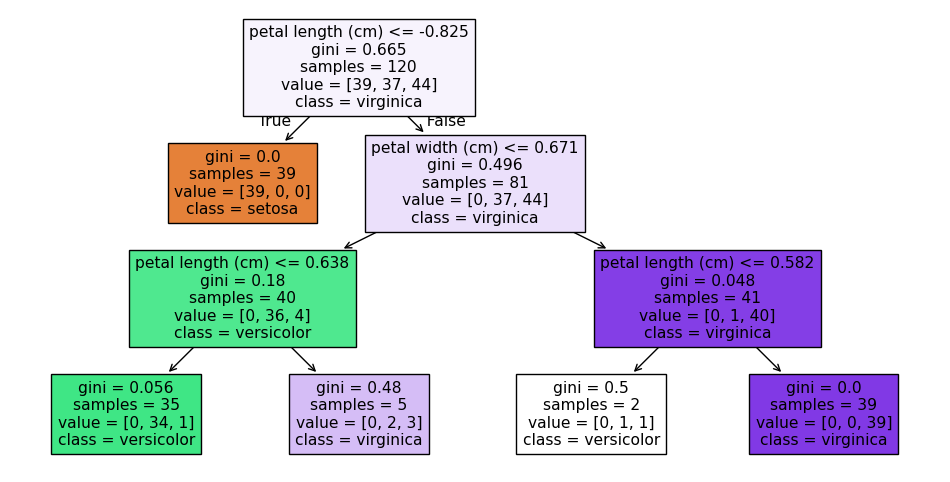

In [ ]:
plt.figure(figsize = (12, 6))
plot_tree(dt_model, feature_names = data.feature_names, class_names = data.target_names, filled = True)
plt.show()

#### Hyperparameter tuning

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
dt = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                'max_depth': [3, 5, 7, 9, 11, 13, 15]}

In [28]:
gs_dt_model = GridSearchCV(dt, param_grid, cv = 5)
gs_dt_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15]})

In [29]:
gs_dt_model.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [30]:
gs_dt_model.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [31]:
accuracy_score(y_test, gs_dt_model.predict(x_test))

1.0

In [33]:
print(classification_report(y_test, gs_dt_model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



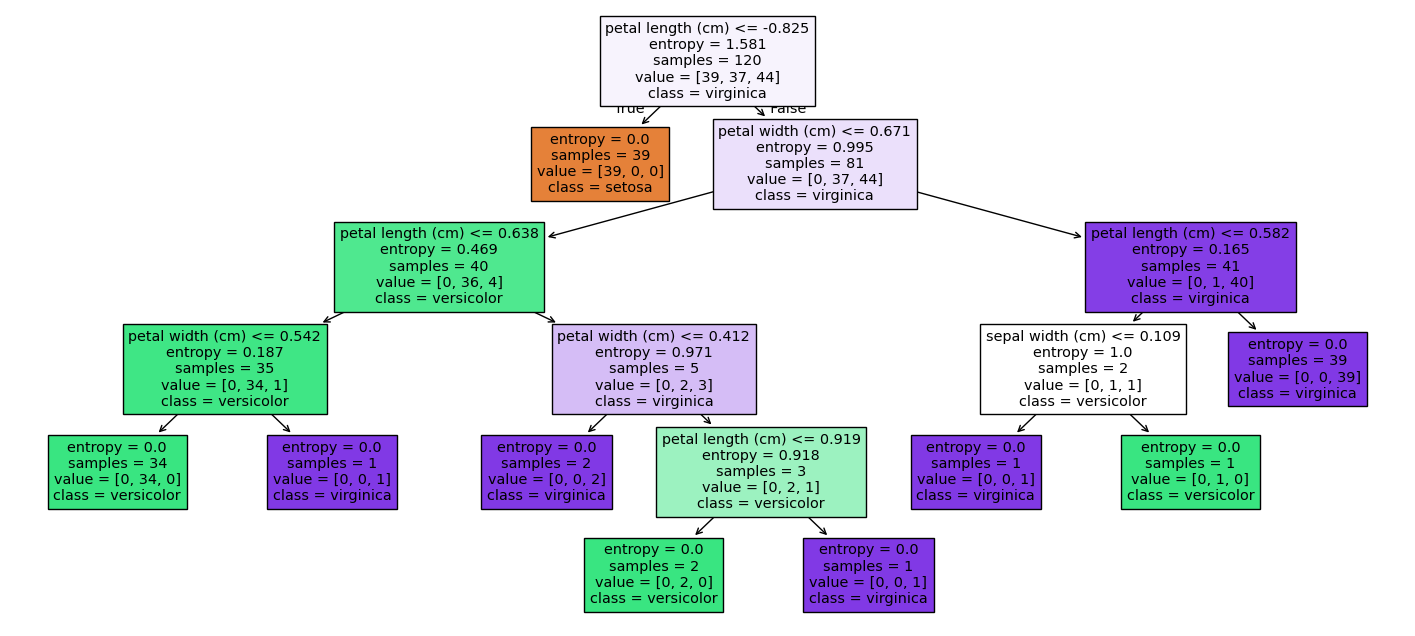

In [37]:
plt.figure(figsize = (18, 8))
plot_tree(gs_dt_model.best_estimator_, feature_names = data.feature_names, class_names = data.target_names, filled = True)
plt.show()

# Randamforest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'gini') # n_estimators = number of trees

In [40]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [41]:
rf_model.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [43]:
print("classification report\n: " , classification_report(y_test, rf_model.predict(x_test)))

classification report
:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [44]:
rf_model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=2120989640),
 DecisionTreeClassifier(max_features='sqrt', random_state=53764860),
 DecisionTreeClassifier(max_features='sqrt', random_state=1685673081),
 DecisionTreeClassifier(max_features='sqrt', random_state=1699078622),
 DecisionTreeClassifier(max_features='sqrt', random_state=412051149),
 DecisionTreeClassifier(max_features='sqrt', random_state=467497717),
 DecisionTreeClassifier(max_features='sqrt', random_state=1498405053),
 DecisionTreeClassifier(max_features='sqrt', random_state=1993069127),
 DecisionTreeClassifier(max_features='sqrt', random_state=524367334),
 DecisionTreeClassifier(max_features='sqrt', random_state=36975930)]

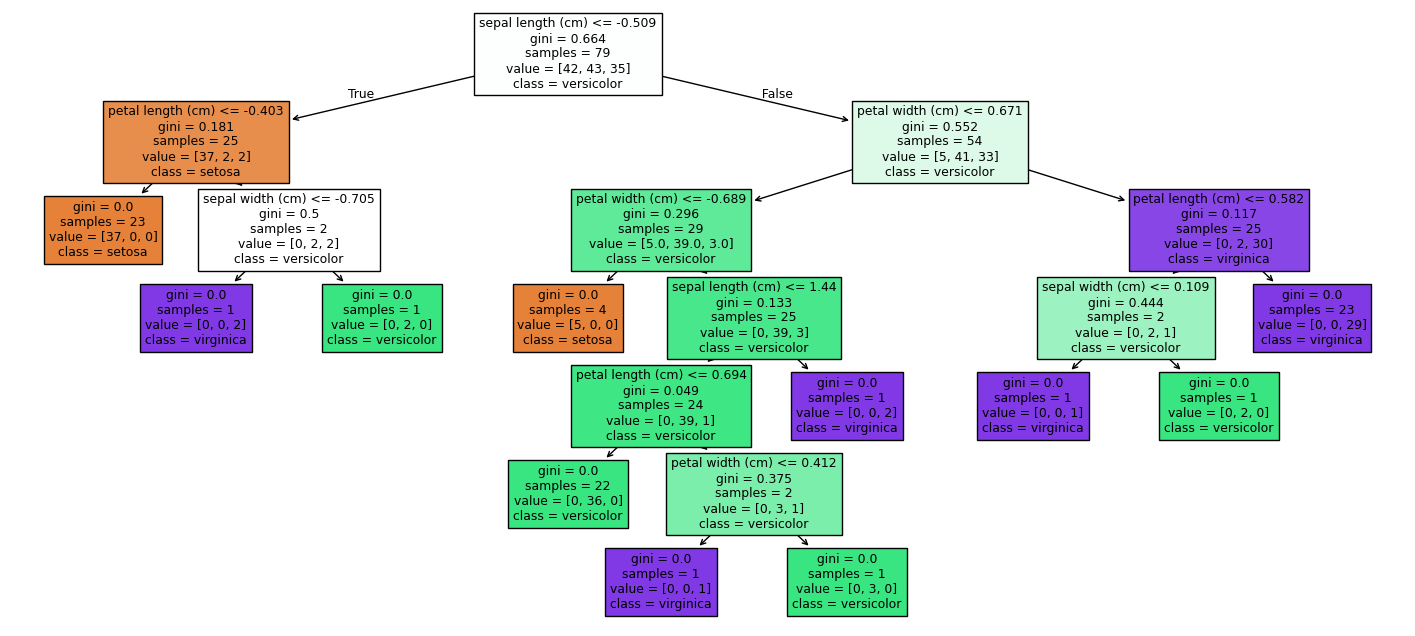

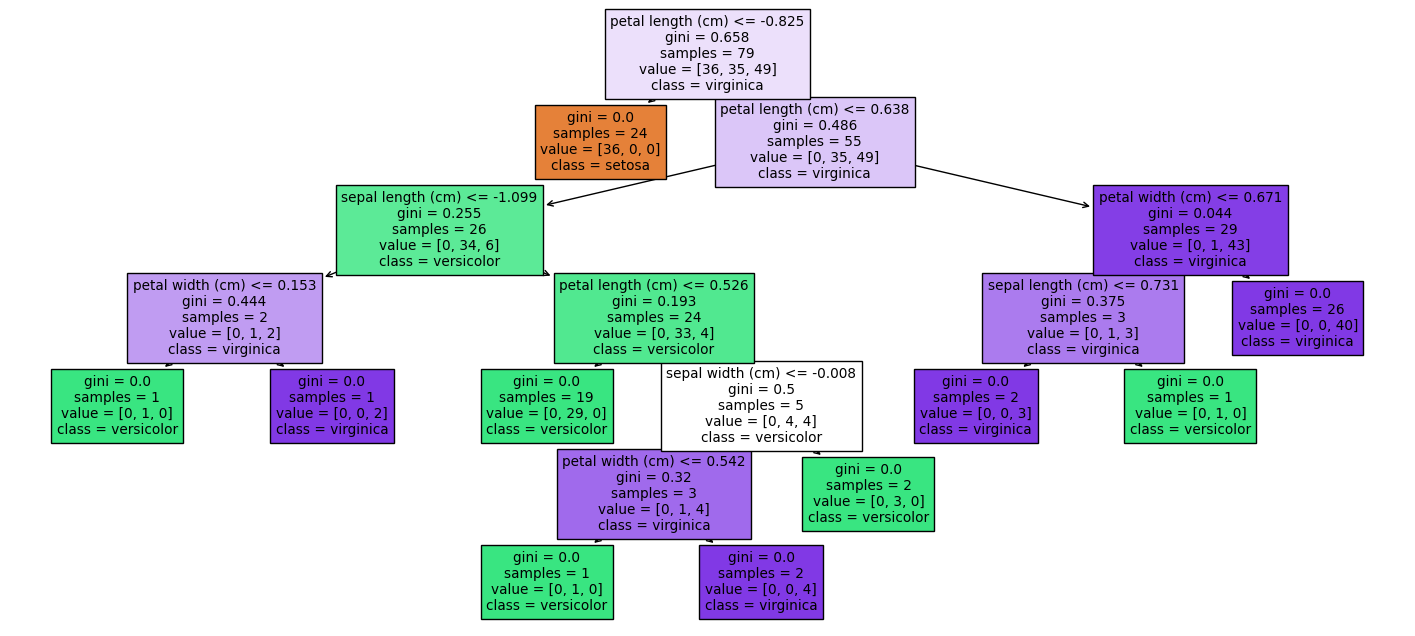

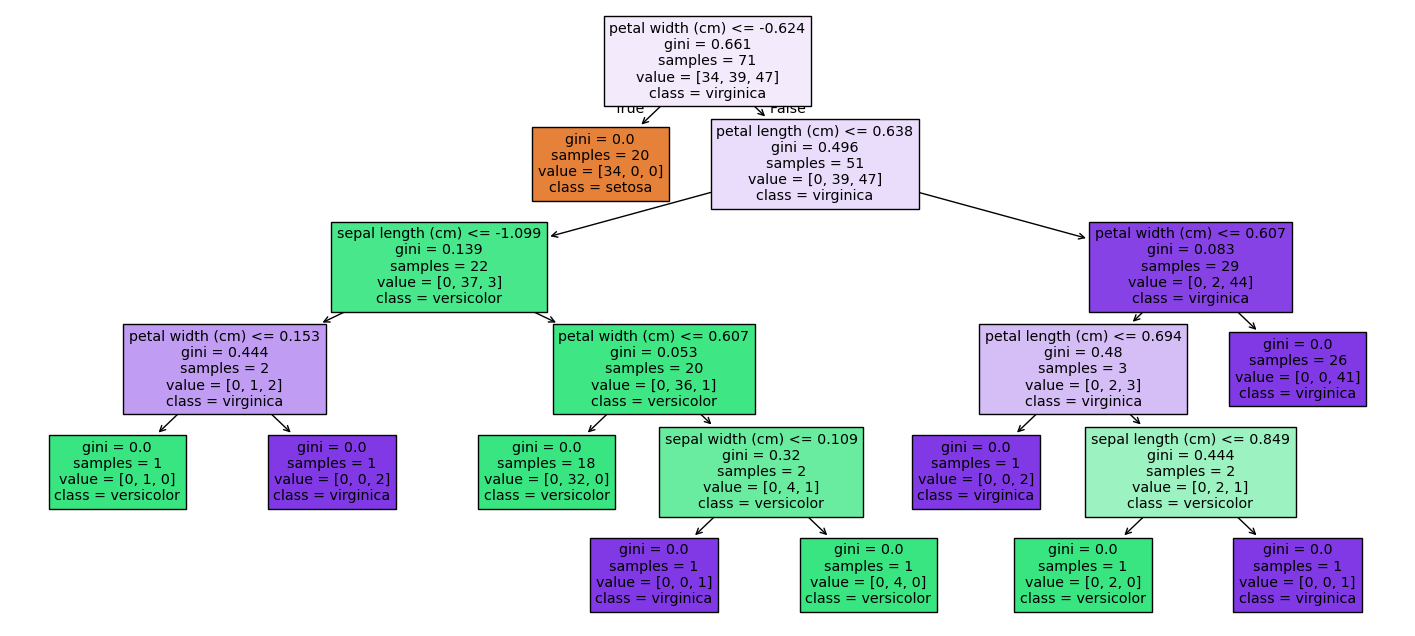

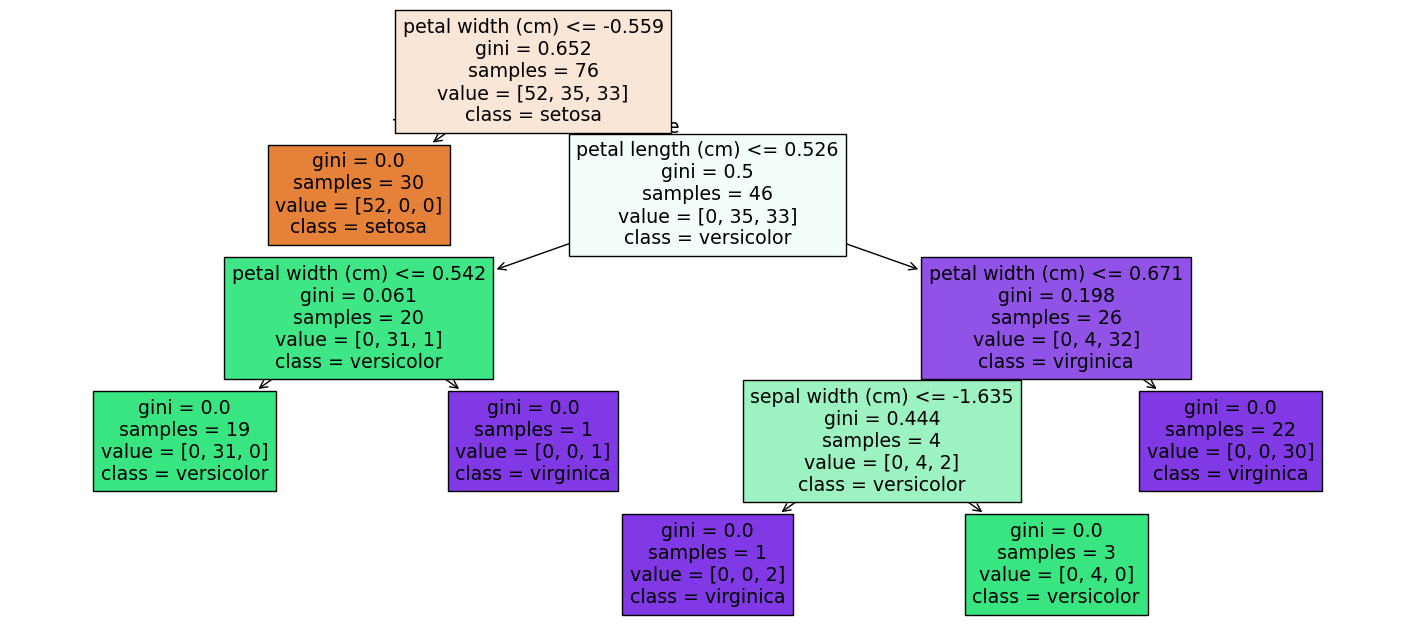

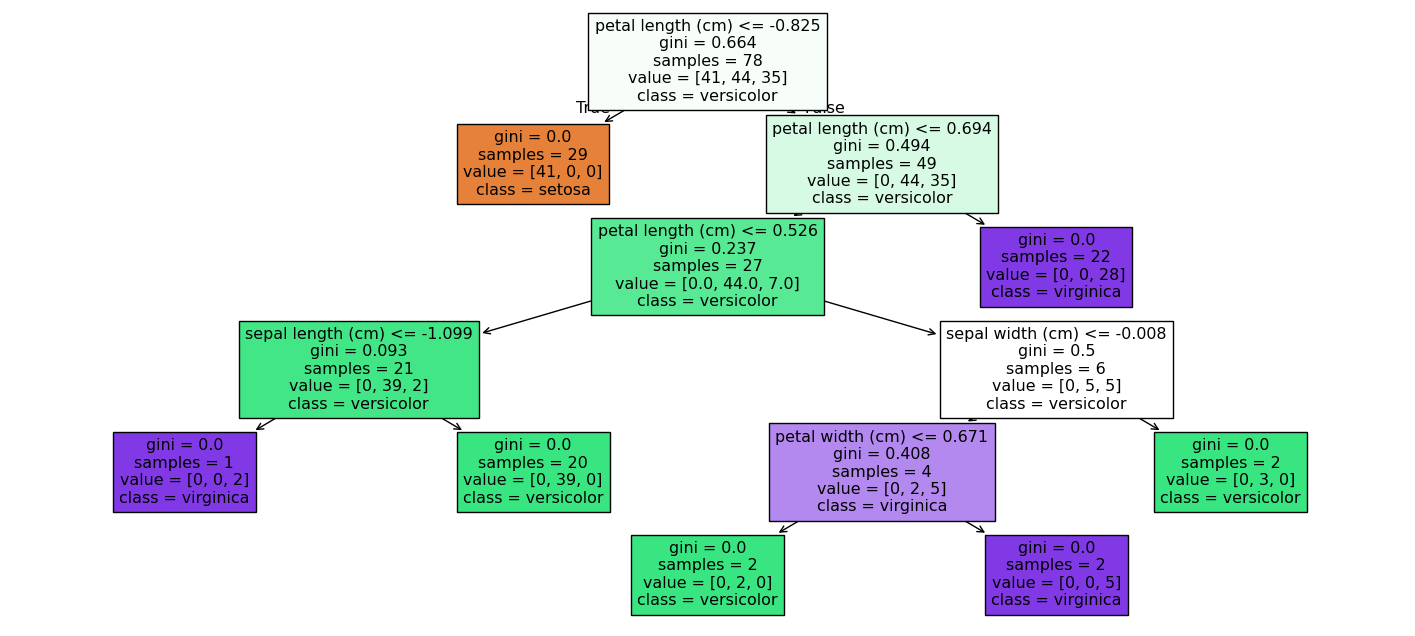

In [47]:
for i in range(5, len(rf_model.estimators_)):
    plt.figure(figsize = (18, 8))
    plot_tree(rf_model.estimators_[i],feature_names = data.feature_names, class_names = data.target_names, filled = True)
    plt.show()

# Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [49]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [50]:
df['target'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [52]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [53]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
x = df.drop('target', axis = 1)
y = df['target']

In [56]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [58]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [59]:
x_train

array([[-0.70962463, -0.60284716,  0.17960722, ..., -0.14595515,
        -0.85071881,  1.52346202],
       [-0.65125171,  1.37738127,  0.30732149, ..., -0.12797078,
         1.33721733, -1.6764423 ],
       [ 0.68297151,  0.18924421, -0.15439894, ..., -0.10042372,
         0.93048561, -1.45214994],
       ...,
       [ 0.88315258, -1.79098421, -0.20270184, ...,  0.10752716,
         0.78555822, -1.10325072],
       [-0.87633644,  0.50608076, -1.03344032, ...,  0.20534167,
        -0.77591757,  0.67115105],
       [-0.62761702, -0.99889284, -0.56950308, ..., -0.0885504 ,
         0.77620806, -1.14810919]], shape=(16512, 8))

In [60]:
x_test

array([[ 0.74816519, -1.31572939, -0.37191053, ...,  0.14088876,
        -0.69176618,  0.19764496],
       [ 0.05757751, -0.12759233, -0.3128834 , ..., -0.12785833,
         0.893085  , -1.362433  ],
       [ 0.34161679, -1.31572939, -0.38717806, ..., -0.16671457,
        -0.92084497,  0.90042769],
       ...,
       [ 0.06027409,  0.34766249, -0.27538532, ...,  0.02241224,
         1.09411332, -1.37738582],
       [-1.54899983,  1.29817213, -0.27704109, ...,  0.11820192,
        -0.77591757,  0.64622968],
       [ 2.10131731,  0.90212645,  0.44761425, ..., -0.04798297,
        -0.6683908 ,  0.68610388]], shape=(4128, 8))

In [63]:
rf_model_reg = RandomForestRegressor(n_estimators = 10, criterion = 'squared_error', random_state = 30)

In [64]:
rf_model_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=30)

In [65]:
rf_model_reg.predict(x_test)

array([2.2622  , 3.7579  , 2.564401, ..., 1.8039  , 0.9452  , 4.420505],
      shape=(4128,))

In [66]:
r2_score(y_test, rf_model_reg.predict(x_test))

0.7926953736069956

In [67]:
mean_squared_error(y_test, rf_model_reg.predict(x_test))    

0.28287759350652364

In [69]:
joblib.dump(rf_model_reg, 'rf_reg_model.pkl')

['rf_reg_model.pkl']

# Support vectore Regressor

In [70]:
from sklearn.svm import SVR

In [71]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [72]:
x = df.drop('target', axis = 1)
y = df['target']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [74]:
x_train.shape

(16512, 8)

In [75]:
x_test.shape

(4128, 8)

In [76]:
y_train.shape

(16512,)

In [77]:
y_test.shape

(4128,)

In [78]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [81]:
svr_regressor_model = SVR(kernel = 'rbf', C = 100, epsilon = 0.1)

In [82]:
svr_regressor_model.fit(x_train, y_train)

SVR(C=100)

In [83]:
svr_regressor_model.predict(x_test)

array([1.42366827, 2.71366427, 1.50963001, ..., 1.04299603, 2.72475753,
       1.33234261], shape=(4128,))

In [84]:
r2_score(y_test, svr_regressor_model.predict(x_test))

0.7764659563865164

In [85]:
mean_squared_error(y_test, svr_regressor_model.predict(x_test))

0.31181636030579646

#### Model visualization

In [90]:
x_single_feature_train = x_train[:,0].reshape(-1, 1)
x_single_feature_test = x_test[:,0].reshape(-1, 1)

In [89]:
x_single_feature_train

array([[-0.72607026],
       [-0.32294264],
       [-0.04383809],
       ...,
       [ 0.30875381],
       [ 1.00335669],
       [-0.08052913]], shape=(16512, 1))

In [91]:
x_single_feature_test

array([[-0.63689577],
       [ 1.24350662],
       [-0.97932789],
       ...,
       [ 0.1456182 ],
       [ 0.91707749],
       [-0.88715285]], shape=(4128, 1))

In [92]:
svr_regressor_model_single_col = SVR(kernel = 'rbf', C = 100, epsilon = 0.1)

In [93]:
svr_regressor_model_single_col.fit(x_single_feature_train, y_train)

SVR(C=100)

In [96]:
y_pred_single = svr_regressor_model_single_col.predict(x_single_feature_test)

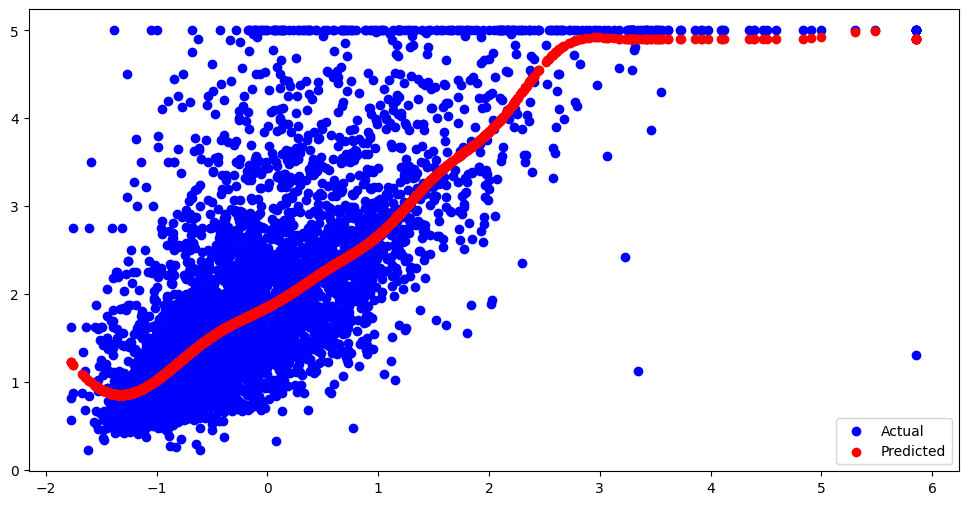

In [104]:
plt.figure(figsize = (12, 6))
plt.scatter(x_single_feature_test[:,0], y_test, color = 'blue', label = 'Actual')
plt.scatter(x_single_feature_test[:,0], y_pred_single, color = 'red', label = 'Predicted')
plt.legend()
plt.show()

In [106]:
x_two_feature_train = x_train[:, :2]
x_two_feature_test = x_test[:, :2]

In [117]:
svr_regressor_model_2d = SVR(kernel = 'rbf', C = 100, epsilon = 0.1)

In [118]:
svr_regressor_model_2d.fit(x_two_feature_train, y_train)

SVR(C=100)

In [119]:
y_pred_2d = svr_regressor_model_2d.predict(x_two_feature_test)

In [120]:
y_pred_2d

array([1.46344486, 2.72589419, 1.09286256, ..., 1.55642262, 2.45629551,
       1.00512472], shape=(4128,))

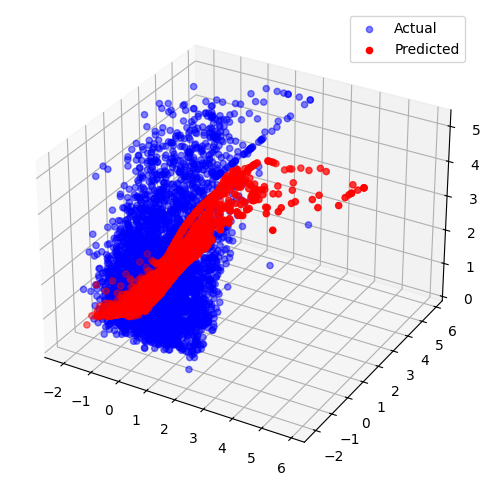

In [121]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_two_feature_test[:,1], x_two_feature_test[:,0], y_test, color = 'blue', label = 'Actual', alpha = 0.5) 
ax.scatter(x_two_feature_test[:,0], x_two_feature_test[:,1], y_pred_2d, color = 'red', label = 'Predicted')
plt.legend()
plt.show()
